In [38]:
import os
import numpy as np
import pandas as pd
import math
import matplotlib.pylab as plt
import seaborn as sns

%matplotlib inline
sns.set(style='ticks', palette='Set2')
!pip install graphviz

In [39]:
# Load data
path = "./churn2.csv"
df = pd.read_csv(path)[["COLLEGE", "INCOME", "OVERAGE", "LEFTOVER", "HOUSE","HANDSET_PRICE","OVER_15MINS_CALLS_PER_MONTH","AVERAGE_CALL_DURATION","REPORTED_SATISFACTION","REPORTED_USAGE_LEVEL","CONSIDERING_CHANGE_OF_PLAN","LEAVE"]].dropna()
# Take a look at the data
df.head(5)

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE
0,zero,31953,0,6,313378,161,0,4,unsat,little,no,STAY
1,one,36147,0,13,800586,244,0,6,unsat,little,considering,STAY
2,one,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,STAY
3,zero,120070,38,33,788235,780,3,2,unsat,very_high,considering,LEAVE
4,one,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,STAY


In [40]:
df.dtypes

COLLEGE                        object
INCOME                          int64
OVERAGE                         int64
LEFTOVER                        int64
HOUSE                           int64
HANDSET_PRICE                   int64
OVER_15MINS_CALLS_PER_MONTH     int64
AVERAGE_CALL_DURATION           int64
REPORTED_SATISFACTION          object
REPORTED_USAGE_LEVEL           object
CONSIDERING_CHANGE_OF_PLAN     object
LEAVE                          object
dtype: object

In [41]:
# Transform COLLEGE column to a numeric variable
df["COLLEGE2"] = (df.COLLEGE == "one").astype(int)
df.head(5)

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE,COLLEGE2
0,zero,31953,0,6,313378,161,0,4,unsat,little,no,STAY,0
1,one,36147,0,13,800586,244,0,6,unsat,little,considering,STAY,1
2,one,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,STAY,1
3,zero,120070,38,33,788235,780,3,2,unsat,very_high,considering,LEAVE,0
4,one,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,STAY,1


In [42]:
df.REPORTED_SATISFACTION = df.REPORTED_SATISFACTION.astype('str')
df.REPORTED_USAGE_LEVEL = df.REPORTED_USAGE_LEVEL.astype('str')
df.CONSIDERING_CHANGE_OF_PLAN = df.CONSIDERING_CHANGE_OF_PLAN.astype('str')

In [43]:
df["LEAVE2"] = (df.LEAVE == "STAY").astype(int)
df.head(5)

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE,COLLEGE2,LEAVE2
0,zero,31953,0,6,313378,161,0,4,unsat,little,no,STAY,0,1
1,one,36147,0,13,800586,244,0,6,unsat,little,considering,STAY,1,1
2,one,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,STAY,1,1
3,zero,120070,38,33,788235,780,3,2,unsat,very_high,considering,LEAVE,0,0
4,one,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,STAY,1,1


In [44]:
df.dtypes

COLLEGE                        object
INCOME                          int64
OVERAGE                         int64
LEFTOVER                        int64
HOUSE                           int64
HANDSET_PRICE                   int64
OVER_15MINS_CALLS_PER_MONTH     int64
AVERAGE_CALL_DURATION           int64
REPORTED_SATISFACTION          object
REPORTED_USAGE_LEVEL           object
CONSIDERING_CHANGE_OF_PLAN     object
LEAVE                          object
COLLEGE2                        int64
LEAVE2                          int64
dtype: object

In [45]:
# Names of different columns
predictor_cols = ["INCOME", "OVERAGE","LEFTOVER","HOUSE","OVER_15MINS_CALLS_PER_MONTH","AVERAGE_CALL_DURATION","COLLEGE2"]
target_col = "LEAVE2"
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[predictor_cols],df[target_col],test_size = 0.5,random_state = 0)

In [46]:
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (10000, 7)
X_test shape: (10000, 7)
y_train shape: (10000,)
y_test shape: (10000,)


In [47]:
from sklearn.tree import DecisionTreeClassifier
# Let's define the model (tree)
decision_tree = DecisionTreeClassifier(max_depth=6, criterion="entropy",max_leaf_nodes = 12, min_samples_leaf = 1) 
# Let's tell the model what is the data
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_leaf_nodes=12)

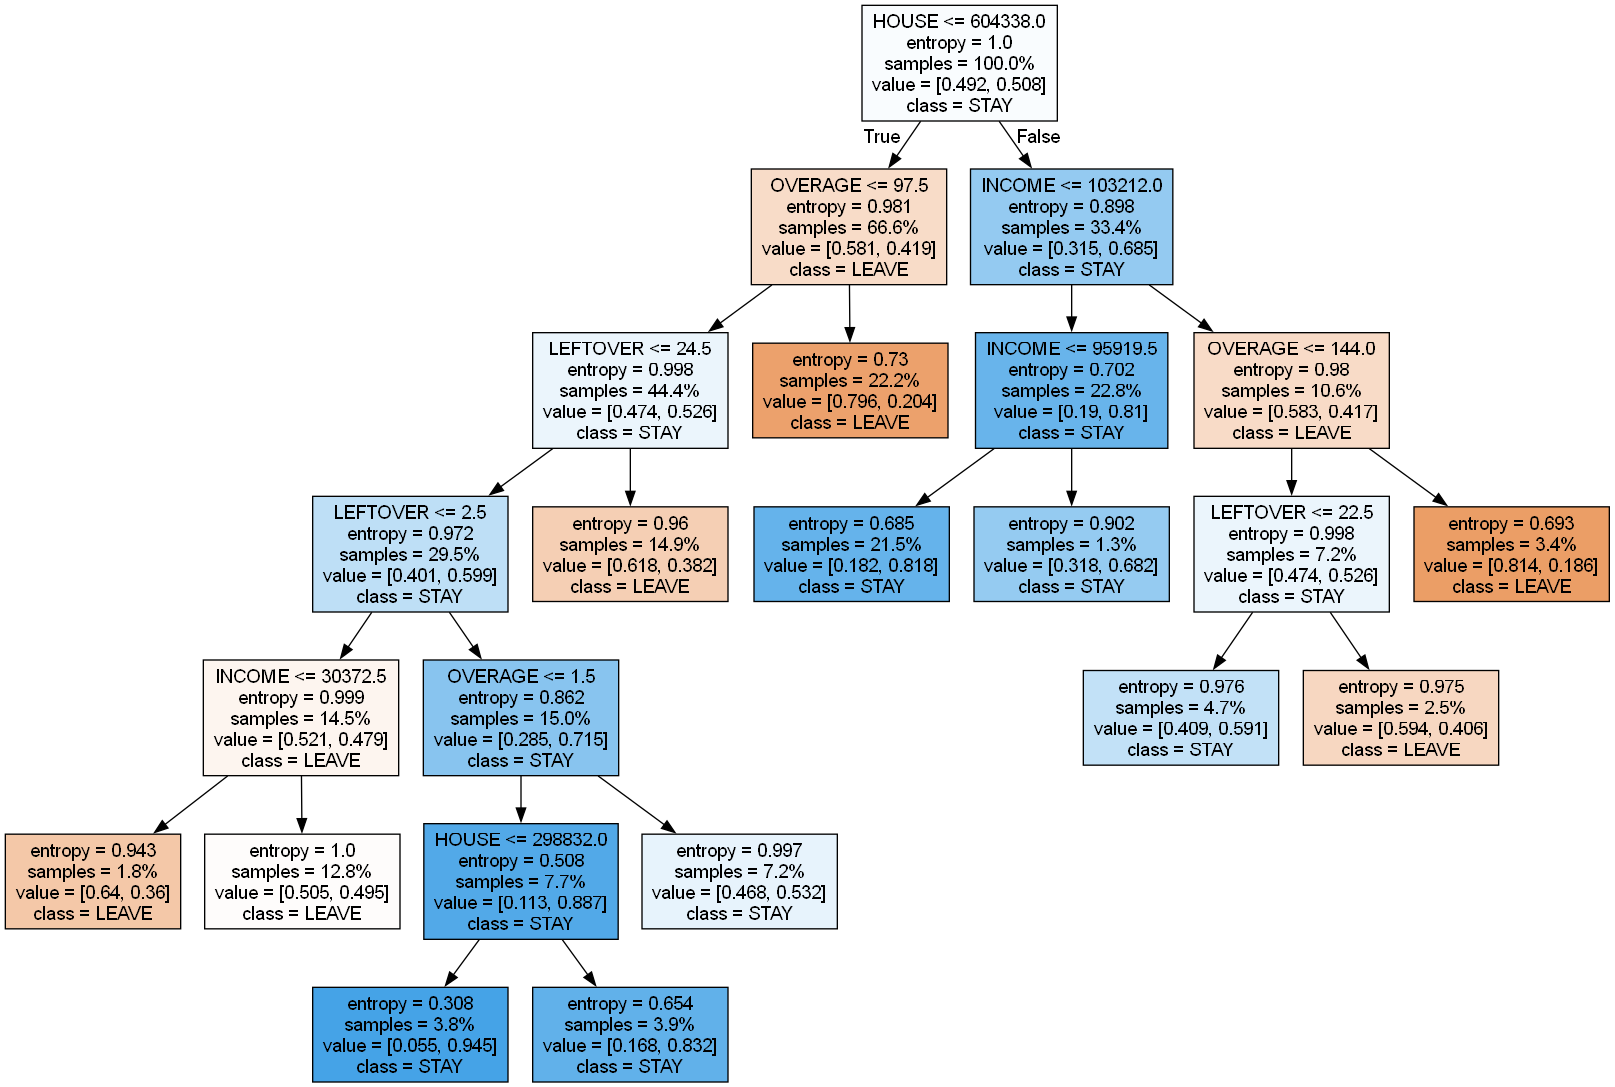

In [48]:
from IPython.display import Image, display
from sklearn.tree import export_graphviz
import os
import subprocess

def visualize_tree(decision_tree, feature_names, class_names, directory="./images", name="tree", proportion=True):
    # Ensure the directory exists
    os.makedirs(directory, exist_ok=True)

    # Export decision tree to DOT format
    dot_name = f"{directory}/{name}.dot"
    export_graphviz(
        decision_tree,
        out_file=dot_name,
        feature_names=feature_names,
        class_names=class_names,
        proportion=proportion,
        filled=True
    )

    # Convert DOT file to PNG using Graphviz
    image_name = f"{directory}/{name}.png"
    result = subprocess.run(["dot", "-Tpng", dot_name, "-o", image_name])
    if result.returncode != 0:
        raise RuntimeError(f"Graphviz 'dot' command failed with return code {result.returncode}")

    # Verify the PNG file exists
    if not os.path.exists(image_name):
        raise FileNotFoundError(f"The PNG file was not created: {image_name}")

    # Display the image in the notebook
    display(Image(filename=image_name))

# Call the function
visualize_tree(decision_tree, predictor_cols, ["LEAVE", "STAY"])


# The following URL in stackoverflow contains some useful information for reference
# https://stackoverflow.com/questions/27817994/visualizing-decision-tree-in-scikit-learn
# https://stackoverflow.com/questions/1494492/graphviz-how-to-go-from-dot-to-a-graph

#https://graphviz.org/download/

In [49]:
y_pred = decision_tree.predict(X_test)
print("Test set score: {: 2f}".format(np.mean(y_pred == y_test)))

Test set score:  0.696800


In [50]:
from sklearn import metrics
print ( "Accuracy = %.3f" % (metrics.accuracy_score(decision_tree.predict(X_test), y_test) ))

Accuracy = 0.697


In [51]:
 predictor_cols = ["INCOME", "OVERAGE","LEFTOVER","HOUSE","OVER_15MINS_CALLS_PER_MONTH","AVERAGE_CALL_DURATION","COLLEGE2"]
X_new = np.array([[90000, 100,30,500000,3, 7,1]])
def Predict_for_New_Value(X_new):
    print("X_new.shape: {}".format(X_new.shape))
    prediction = decision_tree.predict(X_new)
    print("Prediction: {}".format(prediction))
    if(prediction == 0):
        return("LEAVE")
    elif(prediction == 1):
        return("STAY")
    else:
        return("UNKNOWN STATUS..")
    
predicted_status = Predict_for_New_Value(X_new)
print("Predicted value for new record is %s", predicted_status)


X_new.shape: (1, 7)
Prediction: [0]
Predicted value for new record is %s LEAVE


C:\Users\vmtam\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [52]:
# try using a logistic regression instead
from sklearn.linear_model import LogisticRegression
# Initialize logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=0)

In [53]:
# Define predictor (X) and target (y) columns
X = df[["COLLEGE2", "INCOME", "OVERAGE", "LEFTOVER", "HOUSE", "HANDSET_PRICE",
        "OVER_15MINS_CALLS_PER_MONTH", "AVERAGE_CALL_DURATION"]]
y = df["LEAVE"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [54]:
# Initialize logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=0)

# Train the model on the training data
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [55]:
# Predict on the testing data
y_pred = log_reg.predict(X_test)

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)


Accuracy: 0.64
Confusion Matrix:
[[1811 1119]
 [1013 2057]]
Classification Report:
              precision    recall  f1-score   support

       LEAVE       0.64      0.62      0.63      2930
        STAY       0.65      0.67      0.66      3070

    accuracy                           0.64      6000
   macro avg       0.64      0.64      0.64      6000
weighted avg       0.64      0.64      0.64      6000

